1.1. Sử dụng dữ liệu bán hàng 'supermarket_sales_vn.csv':
Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
− Địa phương (HN, SG, ĐN)
− Giới tính

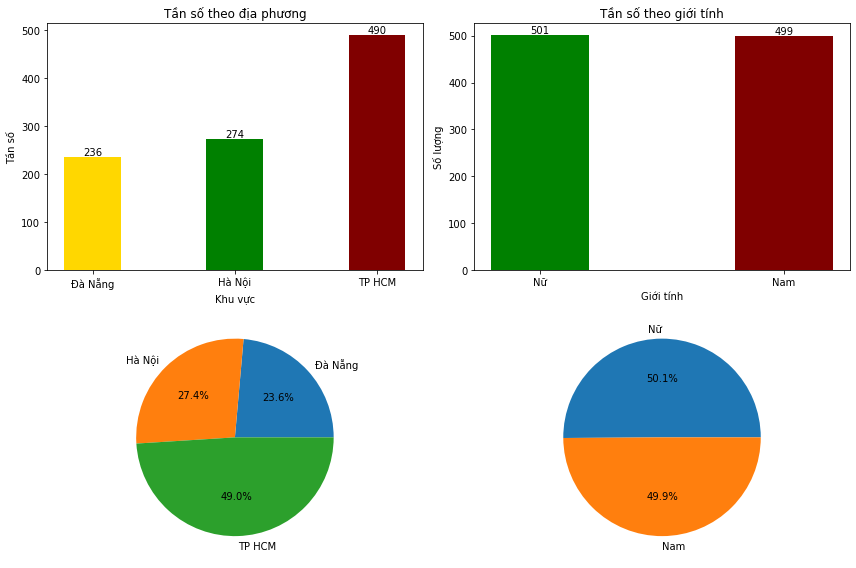

In [2]:
#Check directory
%pwd
#import module
import csv, os
import matplotlib.pyplot as plt
data =[]
with open('data/supermarket_sales_vn.csv', 'r',encoding="utf8") as f:
    fcsv = csv.reader(f)
    next(fcsv)
    for i in fcsv:
        data.append(i)
area = [i[1]for i in data]
sex = [i[3]for i in data]
area_obj = {i: [area.count(i), 100*area.count(i)/len(area)]for i in set(area)}
sex_obj = {i: [sex.count(i), 100*sex.count(i)/len(sex)]for i in set(sex)}
#Create fig
fig,axes = plt.subplots(2, 2, figsize=(12,8), constrained_layout=False)
#location
ax1 = plt.subplot(2,2,1)
areas = list(area_obj.keys())
area_tanso = [i[0]for i in list(area_obj.values())]
#Bar_area
colors = 'gold','green','maroon'
plt.bar(areas, area_tanso, color =colors,
        width = 0.4)
#add label
for i in range(len(areas)):
    plt.text(i, area_tanso[i]+4, area_tanso[i], ha = 'center')
plt.xlabel("Khu vực")
plt.ylabel("Tần số")
plt.title("Tần số theo địa phương")
#sex
ax2 = plt.subplot(2,2,2)
sex = list(sex_obj.keys())
sex_tanso = [i[0]for i in list(sex_obj.values())]
#Bar_sex
colors = 'green','maroon'
plt.bar(sex, sex_tanso, color =colors,
        width = 0.4)
for i in range(len(sex)):
    plt.text(i, sex_tanso[i]+4, sex_tanso[i], ha = 'center')
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.title("Tần số theo giới tính")
#Pie_area
ax3 = plt.subplot(2,2,3)
plt.pie(area_tanso, autopct='%1.1f%%',labels=areas)
#Pie_sex
ax4 = plt.subplot(2,2,4)
plt.pie(sex_tanso, autopct='%1.1f%%',labels=sex)
#Show
plt.tight_layout()
plt.show()  

1.2. Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating
− Phân bố chung
− Theo giới tính, theo địa phương

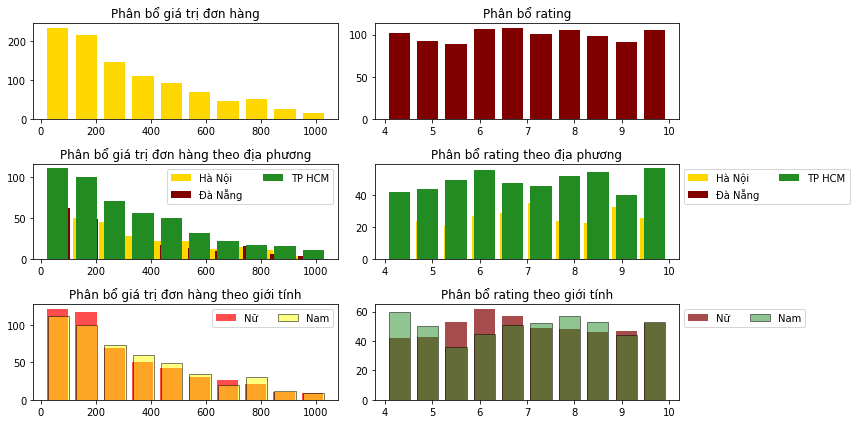

In [3]:
area = [i[1]for i in data]
sex = [i[3]for i in data]
donhang = [float(i[8]) for i in data]
rating = [float(i[13]) for i in data]
#Don hang theo dia phuong
donhang_area = [[i,j]for i,j in zip(area,donhang)]
donhang_hn = [donhang_area[i][1] for i in range(len(donhang_area)) if donhang_area[i][0] == 'Hà Nội']
donhang_dn = [donhang_area[i][1] for i in range(len(donhang_area)) if donhang_area[i][0] == 'Đà Nẵng']
donhang_hcm = [donhang_area[i][1] for i in range(len(donhang_area)) if donhang_area[i][0] == 'TP HCM']
#Don hang theo gioi tinh
donhang_sex = [[i,j]for i,j in zip(sex,donhang)]
donhang_nam = [donhang_sex[i][1] for i in range(len(donhang_sex)) if donhang_sex[i][0] == 'Nữ']
donhang_nu = [donhang_sex[i][1] for i in range(len(donhang_sex)) if donhang_sex[i][0] == 'Nam']
#Rating theo dia phuong
rating_area = [[i,j]for i,j in zip(area,rating)]
rating_hn = [rating_area[i][1] for i in range(len(rating_area)) if rating_area[i][0] == 'Hà Nội']
rating_dn = [rating_area[i][1] for i in range(len(rating_area)) if rating_area[i][0] == 'Đà Nẵng']
rating_hcm = [rating_area[i][1] for i in range(len(rating_area)) if rating_area[i][0] == 'TP HCM']
#Rating theo gioi tinh
rating_sex = [[i,j]for i,j in zip(sex,rating)]
rating_nam = [rating_sex[i][1] for i in range(len(rating_sex)) if rating_sex[i][0] == 'Nữ']
rating_nu = [rating_sex[i][1] for i in range(len(rating_sex)) if rating_sex[i][0] == 'Nam']
# plt.hist(donhang_hn, bins=10, rwidth=0.75, facecolor='red', alpha=0.75)
fig,axes = plt.subplots(3, 2, figsize=(12,6), constrained_layout=False)
ax1 = plt.subplot(3,2,1)
plt.hist(donhang, bins = 10,rwidth=0.75, color = 'gold')
plt.title("Phân bổ giá trị đơn hàng")
ax2 = plt.subplot(3,2,2)
plt.hist(rating, bins = 10,rwidth=0.75, color = 'maroon')
plt.title("Phân bổ rating")
ax3 = plt.subplot(3,2,3)
plt.hist(donhang_hn, bins = 10,rwidth=0.75, color = 'gold')
plt.hist(donhang_dn, bins = 10,rwidth=0.75, color = 'maroon')
plt.hist(donhang_hcm, bins = 10,rwidth=0.75, color = 'forestgreen')
plt.legend(["Hà Nội", "Đà Nẵng","TP HCM"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ giá trị đơn hàng theo địa phương")
ax4 = plt.subplot(3,2,4)
plt.hist(rating_hn, bins = 10,rwidth=0.75, color = 'gold')
plt.hist(rating_dn, bins = 10,rwidth=0.75, color = 'maroon')
plt.hist(rating_hcm, bins = 10,rwidth=0.75, color = 'forestgreen')
plt.legend(["Hà Nội", "Đà Nẵng","TP HCM"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ rating theo địa phương")
ax5 = plt.subplot(3,2,5)
plt.hist(donhang_nu, bins = 10,rwidth=0.75,alpha=.7, color = 'red')
plt.hist(donhang_nam, bins = 10,rwidth=0.75,alpha=.5,edgecolor='black', color = 'yellow')
plt.legend(["Nữ", "Nam"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ giá trị đơn hàng theo giới tính")
ax6 = plt.subplot(3,2,6)
plt.hist(rating_nu, bins = 10,rwidth=0.75,alpha=.7, color = 'maroon')
plt.hist(rating_nam, bins = 10,rwidth=0.75,alpha=.5,edgecolor='black', color = 'forestgreen')
plt.legend(["Nữ", "Nam"],bbox_to_anchor =(1, 1), ncol = 2)
plt.title("Phân bổ rating theo giới tính")
plt.tight_layout()
plt.show()

1.3. Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating

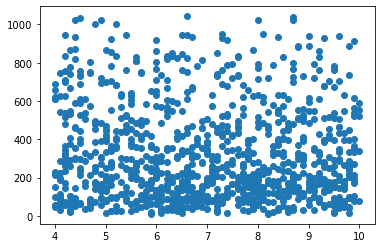

In [4]:
plt.scatter(rating,donhang)
plt.show()

1.4. Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')

In [6]:
#%pip install squarify
import squarify
labels = [i[4]for i in data]
for i in set(labels):
    
plt.rc('font', size=8)

fig = plt.figure(figsize=(10,5))

squarify.plot(sizes=product_line, label=labels,
              color=color_list, alpha=0.7)

plt.axis("off")
plt.show()

{'Fashion accessories', 'Food and beverages', 'Home and lifestyle', 'Electronic accessories', 'Sports and travel', 'Health and beauty'}
